# 로지스틱 회귀분석 (Logistic Regression) 분류모델

In [2]:
# 필요한 패키지 설치
!pip install imblearn
import pandas as pd 
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import *
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\chaew\AppData\Local\Temp\ipykernel_22344\3559870017.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
import matplotlib as pltl
import matplotlib.font_manager as fm

# 한글 폰트 지원
font_path = 'C:/Windows/Fonts/malgun.ttf'

# 폰트 이름 가져오기
font_name = fm.FontProperties(fname=font_path).get_name()

# 폰트 설정
pltl.rc('font', family=font_name)

In [4]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease
df = pd.read_csv("../resource/W5/heart_2020_cleaned.csv")

# 데이터 샘플 확인
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
# 컬럼 정보 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

- BMI, PhysicalHealth 등 4개 숫자형 변수, 나머지는 모두 명목형 변수 확인
- 모든 칼럼에 결측치 없음 확인

## - 명목형 변수 더미처리

- 명목형 변수를 가변수화 (One hot encoding 형태로 변경)

In [6]:
# 명목형 변수 더미처리

# 하나의 가변수 범주 제거 옵션 적용
df_temp = pd.get_dummies(df, columns = ['HeartDisease','Smoking',
                                    'AlcoholDrinking','Stroke',
                                    'DiffWalking','Sex',
                                    'AgeCategory','Race',
                                    'Diabetic','PhysicalActivity',
                                    'GenHealth','Asthma',
                                    'KidneyDisease','SkinCancer']
                     ,drop_first=False
                    )

df_temp.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_No,HeartDisease_Yes,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,16.60,3.0,30.0,5.0,True,False,False,True,True,False,...,False,False,False,True,False,True,True,False,False,True
1,20.34,0.0,0.0,7.0,True,False,True,False,True,False,...,False,False,False,True,True,False,True,False,True,False
2,26.58,20.0,30.0,8.0,True,False,False,True,True,False,...,True,False,False,False,False,True,True,False,True,False
3,24.21,0.0,0.0,6.0,True,False,True,False,True,False,...,False,True,False,False,True,False,True,False,False,True
4,23.71,28.0,0.0,8.0,True,False,True,False,True,False,...,False,False,False,True,True,False,True,False,True,False


In [7]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 52 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   BMI                                  319795 non-null  float64
 1   PhysicalHealth                       319795 non-null  float64
 2   MentalHealth                         319795 non-null  float64
 3   SleepTime                            319795 non-null  float64
 4   HeartDisease_No                      319795 non-null  bool   
 5   HeartDisease_Yes                     319795 non-null  bool   
 6   Smoking_No                           319795 non-null  bool   
 7   Smoking_Yes                          319795 non-null  bool   
 8   AlcoholDrinking_No                   319795 non-null  bool   
 9   AlcoholDrinking_Yes                  319795 non-null  bool   
 10  Stroke_No                            319795 non-null  bool   
 11  Stroke_Yes   

- drop_first=True

    - 각 명목변수를 가변수화 할때 첫번째 가변수화 되는 칼럼을 제거

        예) HeartDisease_No, HeartDisease_YES, Smoking_NO, Smoking_YES => HeartDisease_YES, Smoking_YES

In [8]:
# 명목형 변수 더미처리

# 하나의 가변수 범주 제거 옵션 적용
df2 = pd.get_dummies(df, columns = ['HeartDisease','Smoking',
                                    'AlcoholDrinking','Stroke',
                                    'DiffWalking','Sex',
                                    'AgeCategory','Race',
                                    'Diabetic','PhysicalActivity',
                                    'GenHealth','Asthma',
                                    'KidneyDisease','SkinCancer']
                     ,drop_first=True
                     ,dtype=int
                    )

df2.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,5.0,0,1,0,0,0,0,...,1,0,1,0,0,0,1,1,0,1
1,20.34,0.0,0.0,7.0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,26.58,20.0,30.0,8.0,0,1,0,0,0,1,...,1,0,1,1,0,0,0,1,0,0
3,24.21,0.0,0.0,6.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,23.71,28.0,0.0,8.0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [9]:
df2.describe(include='all')

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
count,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,...,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075,0.085595,0.412477,0.068097,0.037740,0.138870,0.475273,...,0.127588,0.008002,0.775362,0.108435,0.291215,0.035301,0.356034,0.134061,0.036833,0.093244
std,6.356100,7.95085,7.955235,1.436007,0.279766,0.492281,0.251912,0.190567,0.345812,0.499389,...,0.333631,0.089095,0.417344,0.310930,0.454323,0.184539,0.478826,0.340718,0.188352,0.290775
min,12.020000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.030000,0.00000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.340000,0.00000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.420000,2.00000,3.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,94.850000,30.00000,30.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 38 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   BMI                               319795 non-null  float64
 1   PhysicalHealth                    319795 non-null  float64
 2   MentalHealth                      319795 non-null  float64
 3   SleepTime                         319795 non-null  float64
 4   HeartDisease_Yes                  319795 non-null  int32  
 5   Smoking_Yes                       319795 non-null  int32  
 6   AlcoholDrinking_Yes               319795 non-null  int32  
 7   Stroke_Yes                        319795 non-null  int32  
 8   DiffWalking_Yes                   319795 non-null  int32  
 9   Sex_Male                          319795 non-null  int32  
 10  AgeCategory_25-29                 319795 non-null  int32  
 11  AgeCategory_30-34                 319795 non-null  i

## - 숫자형 변수에 대해 Scaler 적용 정규화 (RobustScaler)

In [11]:
# RobustScaler 적용

# 숫자형 변수 분리
df_num = df[['BMI','PhysicalHealth','MentalHealth','SleepTime']]
df_nom = df2.drop(['BMI','PhysicalHealth','MentalHealth','SleepTime'],axis=1)

# 숫자형 변수 RobustScaler 적용
RobustScaler = RobustScaler()
df_robust = RobustScaler.fit_transform(df_num)

# 컬럼명 결합
df_num2 = pd.DataFrame(data=df_robust, columns=df_num.columns)

# 숫자형 테이블과 더미화 문자형 테이블 결합
df3 = pd.concat([df_num2,df_nom],axis=1)

df3.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,-1.453315,1.5,10.0,-1.0,0,1,0,0,0,0,...,1,0,1,0,0,0,1,1,0,1
1,-0.947226,0.0,0.0,0.0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,-0.102842,10.0,10.0,0.5,0,1,0,0,0,1,...,1,0,1,1,0,0,0,1,0,0
3,-0.423545,0.0,0.0,-0.5,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,-0.491204,14.0,0.0,0.5,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [12]:
df3.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,...,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.133342,1.685855,1.299455,0.048537,0.085595,0.412477,0.068097,0.037740,0.138870,0.475273,...,0.127588,0.008002,0.775362,0.108435,0.291215,0.035301,0.356034,0.134061,0.036833,0.093244
std,0.860095,3.975425,2.651745,0.718004,0.279766,0.492281,0.251912,0.190567,0.345812,0.499389,...,0.333631,0.089095,0.417344,0.310930,0.454323,0.184539,0.478826,0.340718,0.188352,0.290775
min,-2.073072,0.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.447903,0.000000,0.000000,-0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.552097,1.000000,1.000000,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,9.135318,15.000000,10.000000,8.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## - 데이터 불균형 문제 여부 확인

In [13]:
# 독립변수와 종속변수 분리하여 생성
X = df3.drop(['HeartDisease_Yes'],axis=1)
y = df3[['HeartDisease_Yes']]

# 학습셋과 테스트셋 분리하여 생성(7.5:2.5)
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.25,random_state=10)

# 학습셋과 검증셋이 잘 나뉘었는지 확인
print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))

train data 개수:  239846
test data 개수:  79949


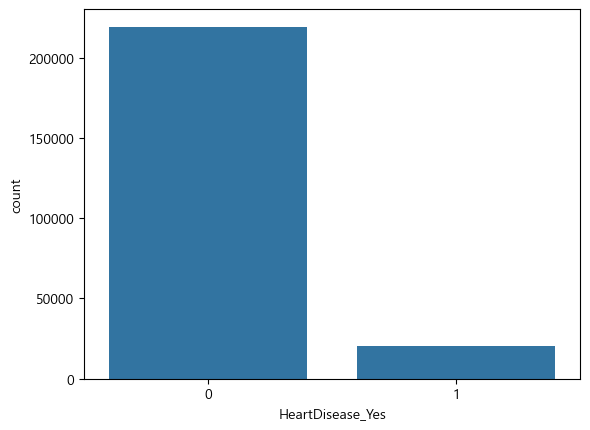

In [14]:
# HeartDisease_Yes 컬럼 클래스 분포 시각화
sns.countplot(x="HeartDisease_Yes", data=y_train)

plt.show()

In [15]:
# 임시 변수명 적용

X_train_re = X_train.copy()
y_train_re = y_train.copy()

X_temp_name = ['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10',
            'X11','X12','X13','X14','X15','X16','X17','X18','X19','X20',
            'X21','X22','X23','X24','X25','X26','X27','X28','X29','X30',
            'X31','X32','X33','X34','X35','X36','X37']
y_temp_name = ['y1']


X_train_re.columns = X_temp_name
y_train_re.columns = y_temp_name

X_train_re.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37
163572,-0.202977,0.0,0.0,-0.5,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
150901,1.476319,0.0,0.0,0.5,1,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
164527,-0.248985,15.0,10.0,-2.0,1,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,0
260971,0.805142,0.0,0.0,0.0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
262287,0.612991,5.0,0.0,0.0,0,0,0,0,1,0,...,1,0,1,0,1,0,0,0,0,0


## - 언더샘플링

In [16]:
# 언더샘플링 적용

X_train_under, y_train_under = RandomUnderSampler(random_state=0).fit_resample(X_train_re,y_train_re)

print('RandomUnderSampler 적용 전 학습셋 변수/레이블 데이터 세트: '
      , X_train_re.shape, y_train_re.shape)
print('RandomUnderSampler 적용 후 학습셋 변수/레이블 데이터 세트: '
      , X_train_under.shape, y_train_under.shape)
print('RandomUnderSampler 적용 전 레이블 값 분포: \n'
      , pd.Series(y_train_re['y1']).value_counts())
print('RandomUnderSampler 적용 후 레이블 값 분포: \n'
      , pd.Series(y_train_under['y1']).value_counts())

RandomUnderSampler 적용 전 학습셋 변수/레이블 데이터 세트:  (239846, 37) (239846, 1)
RandomUnderSampler 적용 후 학습셋 변수/레이블 데이터 세트:  (41036, 37) (41036, 1)
RandomUnderSampler 적용 전 레이블 값 분포: 
 y1
0    219328
1     20518
Name: count, dtype: int64
RandomUnderSampler 적용 후 레이블 값 분포: 
 y1
0    20518
1    20518
Name: count, dtype: int64


In [17]:
print(list(X_train))
print(len(list(X_train)))
print(X_train.columns)
print(X_train.columns.shape)

['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'Smoking_Yes', 'AlcoholDrinking_Yes', 'Stroke_Yes', 'DiffWalking_Yes', 'Sex_Male', 'AgeCategory_25-29', 'AgeCategory_30-34', 'AgeCategory_35-39', 'AgeCategory_40-44', 'AgeCategory_45-49', 'AgeCategory_50-54', 'AgeCategory_55-59', 'AgeCategory_60-64', 'AgeCategory_65-69', 'AgeCategory_70-74', 'AgeCategory_75-79', 'AgeCategory_80 or older', 'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White', 'Diabetic_No, borderline diabetes', 'Diabetic_Yes', 'Diabetic_Yes (during pregnancy)', 'PhysicalActivity_Yes', 'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor', 'GenHealth_Very good', 'Asthma_Yes', 'KidneyDisease_Yes', 'SkinCancer_Yes']
37
Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'Smoking_Yes',
       'AlcoholDrinking_Yes', 'Stroke_Yes', 'DiffWalking_Yes', 'Sex_Male',
       'AgeCategory_25-29', 'AgeCategory_30-34', 'AgeCategory_35-39',
       'AgeCategory_40-44', 'AgeCategory_45-49', 'AgeCategory_50-5

In [18]:
# 컬럼명 복구
X_train_under.columns = list(X_train)
y_train_under.columns = list(y_train)

X_train_under.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
69819,-0.572395,0.0,1.666667,0.5,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
248332,2.365359,6.0,0.333333,-0.5,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
31381,-0.964817,0.0,2.666667,0.5,0,0,0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
152264,-1.246279,0.0,0.000000,-0.5,1,0,0,1,1,0,...,0,0,1,0,1,0,0,1,0,0
90674,0.668471,15.0,0.000000,0.5,1,0,0,0,1,0,...,1,0,1,1,0,0,0,0,0,0


## - scikit-learn 패키지의 로지스틱 회귀 모델 학습

- LogisticRegression()

In [19]:
# 학습셋 모델 학습

model = LogisticRegression()
model.fit(X_train_under, y_train_under)

print('학습셋 모델 정확도:', model.score(X_train_under, y_train_under))

c:\Users\chaew\anaconda3\envs\bigdata\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


학습셋 모델 정확도: 0.7646456769665659


c:\Users\chaew\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
# 테스트셋 모델 적합

print('테스트셋 모델 정확도:', model.score(X_test, y_test))

테스트셋 모델 정확도: 0.7501657306532915


- 학습셋에 대한 모델 정확도와 테스트셋에 대한 모델 정확도가 거의 유사 : 과적합이나 과소적합 없음

## - 계수값 확인: 각 독립변수의 영향력 확인 위함

In [21]:
# 계수값 확인
np.set_printoptions(suppress=True)

print(model.coef_)

[[ 0.08025198  0.01189738  0.02934271 -0.05478058  0.40609967 -0.24650832
   1.2812514   0.20011263  0.75973399 -0.0577023   0.39778761  0.41578395
   0.7869861   1.07628127  1.52821807  1.76607702  2.04627835  2.33239306
   2.68447035  2.84133846  3.20265538 -0.52890524 -0.24340177 -0.18357797
  -0.09690253 -0.05979183  0.28132031  0.48006663  0.4373529  -0.00180984
   1.49896197  1.0272974   1.81040493  0.44539339  0.29494187  0.61706248
   0.14131292]]


## - 다른 패키지 statsmodels의 로지스틱 모델로 비교

- Logit()
- method = 'newton'

In [22]:
# 다른 로지스틱 모델로 학습

model2 = sm.Logit(y_train_under, X_train_under)
results = model2.fit(method = "newton") 

results.summary()

Optimization terminated successfully.
         Current function value: 0.503919
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       HeartDisease_Yes   No. Observations:                41036
Model:                          Logit   Df Residuals:                    40999
Method:                           MLE   Df Model:                           36
Date:                Wed, 03 Apr 2024   Pseudo R-squ.:                  0.2730
Time:                        13:52:11   Log-Likelihood:                -20679.
converged:                       True   LL-Null:                       -28444.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
BMI                                  0.0918      0.015      6.056      0.000       0.062       0.121
PhysicalHealth                       0.0114      0.003      3.367      0.001       0.005       0.018
MentalHealth                         0.0170      0.005      3.478      0.001       0.007       0.027
SleepTime                           -0.0733      0.016     -4.619      0.000      -0.104      -0.042
Smoking_Yes                          0.3696      0.025     14.807      0.000       0.321       0.419
AlcoholDrinking_Yes                 -0.2732      0.053     -5.107      0.000      -0.378      -0.168
Stroke_Yes                           1.2616      0.054     23.555      0.000       1.157       1.367
DiffWalking_Yes                      0.1708      0.035      4.907      0.000       0.103       0.239
Sex_Male                             0.6680      0.025     26.580      0.000       0.619       0.717
AgeCategory_25-29                   -1.4044      0.127    -11.088      0.000      -1.653      -1.156
AgeCategory_30-34                   -0.9200      0.103     -8.905      0.000      -1.122      -0.717
AgeCategory_35-39                   -0.9326      0.097     -9.634      0.000      -1.122      -0.743
AgeCategory_40-44                   -0.5486      0.089     -6.190      0.000      -0.722      -0.375
AgeCategory_45-49                   -0.2661      0.082     -3.244      0.001      -0.427      -0.105
AgeCategory_50-54                    0.1993      0.076      2.636      0.008       0.051       0.348
AgeCategory_55-59                    0.4354      0.072      6.049      0.000       0.294       0.576
AgeCategory_60-64                    0.7295      0.070     10.414      0.000       0.592       0.867
AgeCategory_65-69                    1.0211      0.070     14.680      0.000       0.885       1.157
AgeCategory_70-74                    1.3695      0.070     19.549      0.000       1.232       1.507
AgeCategory_75-79                    1.5302      0.073     20.958      0.000       1.387       1.673
AgeCategory_80 or older              1.8668      0.072     25.936      0.000       1.726       2.008
Race_Asian                          -2.6688      0.120    -22.307      0.000      -2.903      -2.434
Race_Black                          -2.3371      0.081    -28.721      0.000      -2.497      -2.178
Race_Hispanic                       -2.3334      0.080    -29.136      0.000      -2.490      -2.176
Race_Other                          -2.2070      0.093    -23.681      0.000      -2.390      -2.024
Race_White                          -2.1554      0.069    -31.379      0.000      -2.290      -2.021
Diabetic_No, borderline diabetes     0.2903      0.078      3.734      0.000       0.138       0.443
Diabetic_Yes                         0.4801      0.032     14.907      0.000       0.417       0.543
Diabetic_Yes (during pregnancy)      0.2256      0.164      1.376      0.169      -0.096       0.547
PhysicalA

### - scikit-learn 의 Logit() 결과에 대한 해석

- method 옵션 = newton [nm, bfgs, powell]
- 모든 계수의 값
- 모든 독립변수의 p-Value
    - Diabetic_Yes(during pregnancy) 이외의 모든 변수가 유의미

### - Odds Ratio 확인


- OR = exp(logit값) = exp(회귀계수값)
    - 각 독립변수가 결과에 영향력을 줄 확률이 안줄 확률의 몇배인지 확인 가능


In [23]:
# 오즈비 확인

np.exp(results.params)

BMI                                 1.096091
PhysicalHealth                      1.011469
MentalHealth                        1.017101
SleepTime                           0.929300
Smoking_Yes                         1.447148
AlcoholDrinking_Yes                 0.760970
Stroke_Yes                          3.530911
DiffWalking_Yes                     1.186292
Sex_Male                            1.950422
AgeCategory_25-29                   0.245524
AgeCategory_30-34                   0.398530
AgeCategory_35-39                   0.393534
AgeCategory_40-44                   0.577770
AgeCategory_45-49                   0.766331
AgeCategory_50-54                   1.220555
AgeCategory_55-59                   1.545532
AgeCategory_60-64                   2.074125
AgeCategory_65-69                   2.776307
AgeCategory_70-74                   3.933446
AgeCategory_75-79                   4.619038
AgeCategory_80 or older             6.467417
Race_Asian                          0.069335
Race_Black

## - X_test에 대한 예측 결과 확인

In [24]:
pred = np.round(results.predict(X_test[:20]), 1)

print(f'예측 결과:')
print(f'{pred} \n{round(pred,0)}')
print(f'실제 결과: {y_test[:20]}')

예측 결과:
56517     0.1
112447    0.0
40550     0.2
40682     0.0
92585     0.3
282764    0.4
31296     0.2
58497     0.2
203764    0.3
57404     0.3
212294    0.4
26749     0.1
129628    0.0
174082    0.2
116191    0.4
83555     0.2
252043    0.7
242048    0.0
283062    0.1
93973     0.6
dtype: float64 
56517     0.0
112447    0.0
40550     0.0
40682     0.0
92585     0.0
282764    0.0
31296     0.0
58497     0.0
203764    0.0
57404     0.0
212294    0.0
26749     0.0
129628    0.0
174082    0.0
116191    0.0
83555     0.0
252043    1.0
242048    0.0
283062    0.0
93973     1.0
dtype: float64
실제 결과:         HeartDisease_Yes
56517                  0
112447                 0
40550                  0
40682                  0
92585                  0
282764                 0
31296                  0
58497                  0
203764                 0
57404                  0
212294                 0
26749                  0
129628                 0
174082                 0
116191              

## - 모델의 성능 평가하기

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

pred_test = results.predict(X_test)

- Confusion matrix

In [26]:
print(y_test.shape, type(y_test))

(79949, 1) <class 'pandas.core.frame.DataFrame'>


In [27]:
print(pred_test.shape, type(pred_test))

(79949,) <class 'pandas.core.series.Series'>


In [28]:
pred_test.head()

56517     0.145794
112447    0.045167
40550     0.189068
40682     0.031712
92585     0.278162
dtype: float64

In [29]:
y_test.head()

,HeartDisease_Yes
56517,0
112447,0
40550,0
40682,0
92585,0


In [30]:
# prediction 된 확률값에 대해 판별
pred_class = np.where(pred_test > 0.5, 1, 0) # 0.5보다 크면 추정한 HeartDisease가 1(Yes), 작으면 0(No)

In [31]:
confusion_matrix(y_test, pred_class)

array([[54295, 18799],
       [ 1513,  5342]], dtype=int64)

- Accuracy
- Precision
- Recall
- f1
- ROC AUC

In [32]:
accuracy = accuracy_score(y_test, pred_class)
precision = precision_score(y_test, pred_class)
recall = recall_score(y_test, pred_class)
f1 = f1_score(y_test, pred_class)
roc_auc = roc_auc_score(y_test, pred_class)

print(f'정확도(accuracy): {accuracy:.3f}\n정밀도(precision): {precision:.3f}\n재현율(recall): {recall:.3f}\nf1 스코어: {f1:.3f}\nROC AUC: {roc_auc:.3f} ')

정확도(accuracy): 0.746
정밀도(precision): 0.221
재현율(recall): 0.779
f1 스코어: 0.345
ROC AUC: 0.761 


In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_class))

              precision    recall  f1-score   support

           0       0.97      0.74      0.84     73094
           1       0.22      0.78      0.34      6855

    accuracy                           0.75     79949
   macro avg       0.60      0.76      0.59     79949
weighted avg       0.91      0.75      0.80     79949



In [34]:
print(f'f1 스코어: {2*(0.221*0.779)/(0.221+0.779)}')
print(f'macro avg: {(0.97 + 0.22)/2:.2f}')
print(f'weighted avg: {(0.97*73094/79949 + 0.22*6855/79949):.2f}')

f1 스코어: 0.344318
macro avg: 0.59
weighted avg: 0.91


In [35]:
y_test.sum()

HeartDisease_Yes    6855
dtype: int64

In [36]:
pred_class.sum()

24141